## Вариант 7

### Распределения

$$X_1 \sim N(-1, 2)$$

$$X_2 \sim R(-2, 0)$$

### Объёмы выборок

$$n_1 = 100$$

$$n_2 = 100$$

### Стат гипотеза $H_0$

$$\sigma_1 = 2$$

$$(m_1 - не изв.)$$

# 1. Исходные данные

## Характеристики наблюдаемых случайных величин:
| СВ    | Распределение | Параметры                  | Математическое ожидание, $m_i$ | Дисперсия, $\sigma_i^2$ |
|-------|---------------|----------------------------|--------------------------------|-------------------------|
| $X_1$ | $N(-1, 2)$    | $m_1 = -1, \sigma_1^2 = 2$ | $m_1 = -1$                     | $\sigma_1^2 = 4$        |
| $X_2$ | $R(-2, 0)$    | $a = -2, b = 0$            | $m_2 = -1$                     | $\sigma_2^2 = 1/3$      |

In [50]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
np.random.seed(404)

In [51]:
X1 = np.random.normal(-1, 2, 100)
X1

array([-3.36538178,  1.67492331, -1.62861009,  0.11328621, -1.41859866,
       -1.02360073,  1.46986689, -1.08683788, -2.36357447,  1.40138394,
        1.68788877, -2.668218  ,  1.07199539,  2.33159819,  0.89895712,
        1.13401904, -0.21103844,  0.20070923, -3.70660894, -2.92899236,
       -1.70133881, -0.35770499, -3.01248288,  0.49759164, -0.93935259,
       -0.6363014 , -1.9948701 , -1.67443837, -0.02529859, -0.9474701 ,
       -1.35967285, -2.11789992,  0.08230484, -1.55399335, -1.22133528,
       -0.38046434,  2.52926686, -1.52853436,  0.74799239,  1.16419341,
       -1.88950274, -1.29579656,  2.25853699,  1.20026458, -1.80822415,
        0.05285067,  2.2576585 , -1.94054933, -1.84086666, -3.58441617,
        2.97247571, -0.52901049, -2.91979201, -0.99323536, -1.89903624,
       -2.66395926, -3.12798265,  0.81139257,  0.80268194,  3.40757196,
       -2.46051545,  0.33736853, -1.08192246, -0.72384347, -0.44395154,
       -1.37147146, -3.73324971, -0.6117227 , -4.30999599, -0.65

In [52]:
X2 = np.random.uniform(-2, 0, 100)
X2

array([-1.79585121, -0.63448256, -0.51857688, -1.4927726 , -0.7151795 ,
       -1.84920321, -1.99721138, -0.90281794, -0.0182941 , -1.98744291,
       -0.62923277, -0.43901955, -0.74210048, -1.63420175, -1.76879798,
       -1.3181282 , -1.19335598, -1.39038709, -1.09700213, -0.00321011,
       -1.0430837 , -1.05373111, -0.86715612, -0.01463504, -0.65462507,
       -1.46084586, -1.47107601, -0.00988351, -1.84111026, -0.20710488,
       -0.88730549, -1.41736754, -1.65875325, -0.85195628, -0.48035751,
       -1.87066044, -0.69771817, -0.61423633, -0.94877429, -1.43727534,
       -1.64980703, -1.0987118 , -1.53328548, -0.38539363, -0.79971225,
       -0.94777639, -0.1869878 , -0.73208194, -0.91753785, -0.94216444,
       -0.84104773, -0.77709782, -0.69994932, -0.16492879, -0.60978591,
       -1.82915928, -1.14202942, -1.95398738, -1.67150364, -0.29612113,
       -1.26391329, -1.40188632, -1.11788397, -0.70244207, -0.65485008,
       -0.25555895, -0.0681654 , -0.04207531, -0.22390968, -0.10

In [53]:
m1 = np.mean(X1)
m1

-0.7764808262435907

In [54]:
m2 = np.mean(X2)
m2

-0.9711955586251331

In [55]:
s1 = np.var(X1, ddof=1)
s1

4.019749373354324

In [56]:
s2 = np.var(X2, ddof=1)
s2

0.3292866458052031

In [57]:
s1 = np.std(X1, ddof=1)
s1

2.004931263997428

In [58]:
s2 = np.std(X2, ddof=1)
s2

0.5738350336161109

## Выборочные характеристики

| СВ    | Среднее, $\bar{x}_i$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ | Объем выборки, $n_i$ |
|-------|----------------------|---------------------------|----------------------|----------------------|
| $X_1$ | $m_1 = -0.78$        | $s_1 = 3.98$              | $s_1 = 1.99$         | $n_1 = 100$          |
| $X_2$ | $m_2 = -0.97$        | $s_2 = 0.33$              | $s_2 = 0.57$         | $n_2 = 100$          |

In [59]:
Z, p_value = ztest(X1, alternative='smaller')
p_value = 1 - p_value
Z, p_value

(-3.8728550957674464, 0.9999462161063082)

In [60]:
Z, p_value = stats.ttest_1samp(a=X1, popmean=-1, axis=0, alternative='less')
p_value = 1 - p_value
Z, p_value

(1.1148470661819956, 0.13380751198269003)

In [61]:
def chisquare(dist, m, d, bins=10, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    # normal = stats.norm.pdf(np.linspace(np.min(X1), np.max(X1), 2 * num + 1), -1, s1 * 2)[1::2]
    # normal = np.array([100 / (np.max(X1) - np.min(X1))] * num)
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, stats.chi2.cdf(Z, bins - 1 - ddof)

In [62]:
# counts, bins = np.histogram(np.random.normal(-1, 2, 100000), bins=100)
# plt.stairs(counts, bins)

In [63]:
# x = np.linspace(bins[0], bins[-1], 101)
# plt.stairs((stats.norm.cdf(bins[1:], -1, 2) - stats.norm.cdf(bins[:-1], -1, 2)) * 100000, bins)

In [64]:
def var(dist, m):
    return np.sum((dist - m) ** 2) / dist.shape[0]
def std(dist, m):
    return np.sqrt(var(dist, m))

In [65]:
# num = 10
d1 = std(X1, -1)
Z, p_value = chisquare(X1, -1, d1, ddof=1)
p_value = 1 - p_value
Z, p_value

(10.601787852553052, 0.2252988694257958)

In [66]:
d1, s1

(2.0073646157730116, 2.004931263997428)

In [67]:
Z, p_value = chisquare(X1, m1, s1, ddof=2)
p_value = 1 - p_value
Z, p_value

(8.793684165680396, 0.2678101053813777)

# 2. Однопараметрические критерии

## Для случайной величины $X_1$

| Тест                              | Стат. гипотеза, $H_0$         | Выборочное значение статистики критерия | $p-value$ | Стат. решение при $\alpha = 0.01$ | Ошибка стат. решения |
|-----------------------------------|-------------------------------|-----------------------------------------|-----------|-----------------------------------|----------------------|
| z-test                            | $X_1 \sim N(m_1, \sigma_1^2)$ | $-3.87$                                 | $0.99$    | Принимаем $H_0$                   | -                    |
| t-test                            | $M(X_1) = m$                  | $1.11$                                  | $0.13$    | Принимаем $H_0$                   | -                    |
| $\chi^2$-test<br/> ($m$ - изв)    | $X_1 \sim N(-1, s_1)$         | $10.6$                                  | $0.23$    | Принимаем $H_0$                   | -                    |
| $\chi^2$-test<br/> ($m$ - не изв) | $X_1 \sim N(m_1, s_1)$        | $8.91$                                  | $0.26$    | Принимаем $H_0$                   | -                    |

In [68]:
Z, p_value = stats.ttest_ind(X1, X2, alternative='less')
p_value = 1 - p_value
Z, p_value

(0.9336891450810257, 0.17580074283903702)

In [69]:
def f_test(dist1, dist2, m1, m2):
    d1, d2 = var(dist1, m1), var(dist2, m2)
    f = d1 / d2
    n1, n2 = dist1.shape[0] - 1, dist2.shape[0] - 1
    return f, stats.f.cdf(f, n1, n2)

In [70]:
Z, p_value = f_test(X1, X2, m1, m2)
p_value = 1 - p_value
Z, p_value

(12.207447294210338, 1.1102230246251565e-16)

In [71]:
Z, p_value = stats.f_oneway(X1, X2)
p_value = 1 - p_value
Z, p_value

(0.8717754196421356, 0.6483985143219054)

# 3. Двухвыборочные критерии

## Для случайных величин $X_1$, $X_2$

| Тест                               | Стат. гипотеза, $H_0$ | Выборочное значение статистики критерия | $p-value$             | Стат. решение при $\alpha = 0.01$ | Ошибка стат. решения |
|------------------------------------|-----------------------|-----------------------------------------|-----------------------|-----------------------------------|----------------------|
| 2-sample t-test                    | $M(X_1) = M(X_2)$     | $0.93$                                  | $0.18$                | Принимаем $H_0$                   | Ошибка второго рода  |
| 2-sample F-test<br/>($m$ - изв)    | $D(X_1) = D(X_2)$     | $12.21$                                 | $1.11 \cdot 10^{-16}$ | Отвергаем $H_0$                   | -                    |
| 2-sample F-test<br/>($m$ - не изв) | $D(X_1) = D(X_2)$     | $0.87$                                  | $0.65$                | Принимаем $H_0$                   | Ошибка второго рода  |

In [72]:
Xs = np.random.normal(-1, 2, 100 * 1000).reshape((100, 1000,))
stds = np.var(Xs, axis=0, ddof=1)
chi_sq = (100 - 1) * stds / 4
np.mean(chi_sq)

98.75625236189308

In [73]:
np.var(chi_sq, ddof=1)

203.05025027536573

In [74]:
np.std(chi_sq, ddof=1)

14.249570178618221

In [75]:
p_values = stats.distributions.chi2.cdf(chi_sq, 100 - 1)
p_values

array([9.93239355e-01, 9.64137839e-01, 5.87790463e-01, 6.27901108e-01,
       5.36870779e-01, 1.58525808e-01, 7.13193662e-01, 1.55554029e-02,
       1.89896711e-01, 5.97813904e-02, 3.54920523e-01, 9.86488349e-02,
       7.49577328e-02, 2.31987503e-01, 1.14744937e-01, 1.77345484e-01,
       2.35197617e-01, 2.66755073e-01, 8.75432836e-01, 6.89828874e-01,
       7.80769631e-01, 1.30865561e-01, 9.36521007e-01, 4.72793384e-01,
       5.87693141e-01, 3.62015326e-01, 9.78435303e-01, 4.75134678e-01,
       5.86050820e-01, 4.34562648e-01, 7.67571001e-01, 8.90738357e-01,
       3.06950826e-01, 1.09496588e-01, 3.30746815e-01, 7.17677243e-01,
       2.80479393e-01, 3.89599771e-02, 4.57515077e-01, 2.93920315e-01,
       5.60213971e-01, 5.93264275e-01, 8.28483036e-01, 2.79591094e-01,
       4.94996970e-01, 7.09043412e-01, 6.91446940e-01, 3.55853649e-01,
       8.22202221e-01, 8.19865772e-01, 3.25518887e-01, 9.24298579e-01,
       9.18218161e-01, 6.93403101e-01, 4.26311979e-01, 3.93018661e-01,
      

In [76]:
np.mean(p_values)

0.4946062496631431

In [77]:
np.var(p_values, ddof=1)

0.08281006267958471

In [78]:
np.std(p_values, ddof=1)

0.28776737598203295

In [79]:
1/12

0.08333333333333333

In [80]:
1/np.sqrt(12)

0.2886751345948129

# 4. Исследование распределений статистик критерия

## Статистическая гипотеза $H_0$: $\sigma_1 = 2$ ($m_1$ - не изв)

## Формула расчёта статистики критерия $Z$: $\chi^2=\frac{(n-1) s^2}{\sigma^2}$

## Формула расчёта статистики $P-value$:  $f(x)= \begin{cases}\frac{x^{k / 2-1} e^{-x / 2}}{2^{k / 2} \Gamma(k / 2)} & \text { for } x \geq 0 \\ 0 & \text { otherwise }\end{cases}$

## Число серий экспериментов $N$: 1000

## Теоритические характеристики:

| СВ        | Распределение в условиях $H_0$ | Параметры | Математическое ожидание | Дисперсия         | С.к.о.                   |
|-----------|--------------------------------|-----------|-------------------------|-------------------|--------------------------|
| $Z$       | $Z \sim \chi^2(n-1)$           |           | $n - 1 = 99$            | $2n - 2 = 198$    | $\sqrt{2n - 2} = 14.07$  |
| $P-value$ | $P-value \sim R(0, 1)$         |           | $1/2 = 0.5$             | $1/12 \sim 0.083$ | $1/\sqrt{12} \sim 0.288$ |

## Выборочные характеристики:

| СВ        | Среднее | Параметры | Оценка дисперсии | Оценка с.к.о. |
|-----------|---------|-----------|------------------|---------------|
| $Z$       | $98.5$  |           | $202.0$          | $14.21$       |
| $P-value$ | $0.49$  |           | $0.086$          | $0.293$       |

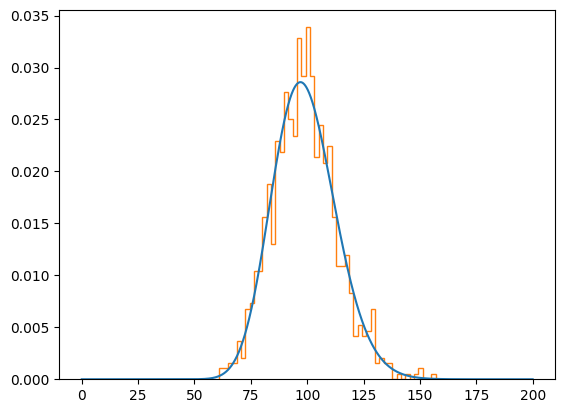

In [81]:
x = np.linspace(0, 200, 10000)
y = stats.distributions.chi2.pdf(x, 100 - 1)
plt.plot(x, y)
counts, bins = np.histogram(chi_sq, bins=50)
plt.stairs(counts * 50 / (1000 * (bins[-1] - bins[0])), bins)
plt.show()

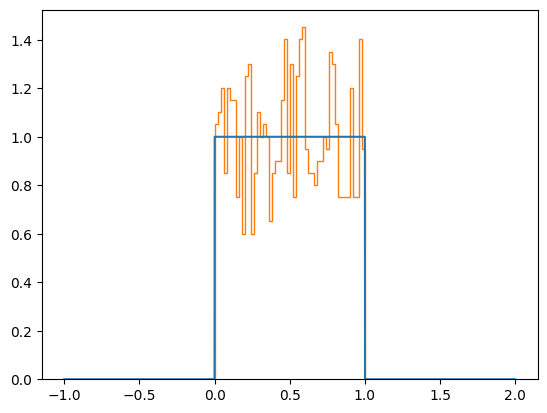

In [89]:
x = np.linspace(-1, 2, 10000)
y = stats.distributions.uniform.pdf(x, 0, 1)
plt.plot(x, y)
counts, bins = np.histogram(p_values, bins=50)
plt.stairs(counts * 50 / (1000 * (bins[-1] - bins[0])), bins)
plt.show()